                                 Multiple Linear Regression

Simple Linear Regression:

                        Y = β 0 + β 1 X + ϵ

Multiple Linear Regression:



                        Y = β0 + β1X1 + β2X2 + . . . + βp Xp + ϵ

                 sales=β0 + β1 × TV + β2 × Radio + β3 × Newspaper + ϵ

sales ->  is the dependent or predicted variable

β0  -> slope coefficient and is the y-intercept

β1,β2,β3 -> β1,β2 and β3 are the regression coefficients representing the change in y relative to a one-unit change in x1, x2 and x3, respectively.

TV, radio, newspaper: response or target variables

ϵ -> ϵ is the model’s random error (residual) term.

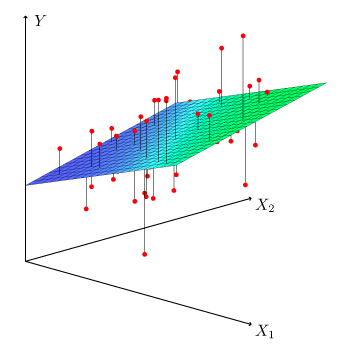

•Data Set Definition

It is based on the Advertising Dataset, taken from the masterpiece book Introduction to Statistical Learning by Hastie, Witten, Tibhirani, James.The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.

# •Importing Libraries

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from yellowbrick.regressor import PredictionError, ResidualsPlot
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# •Reading and Understanding the Data

In [293]:
df = pd.read_csv("advertising (1).csv")

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [295]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,TV,float64,190,0
1,Radio,float64,167,0
2,Newspaper,float64,172,0
3,Sales,float64,121,0


•Statistical information

In [296]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# • Checking for missing value

•Check duplicate values

In [297]:
df_dup=df.duplicated().any()
df_dup

False

no duplicate value

•Missing value

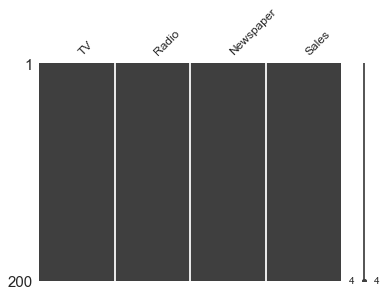

In [298]:
#pip install missingno
#import missingno as msno

msno.matrix(df,figsize=(6,4),fontsize=12);

##different ways
#sns.heatmap(df.isnull(),cmap='PuBu')
#df.isna().sum()

It seems that there is no missing value

# •Outlier Analysis

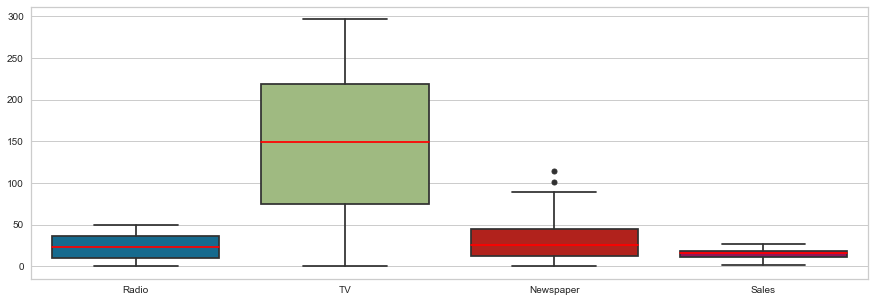

In [299]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df[["Radio", "TV","Newspaper","Sales"]],
            medianprops={"color": "red"},
            flierprops={"marker": "o"},
            orient="v");

Radio, TV and Sales No Outliers. We also neglect outliers in the newspaper.

# EDA

•Effect of sales on different variables

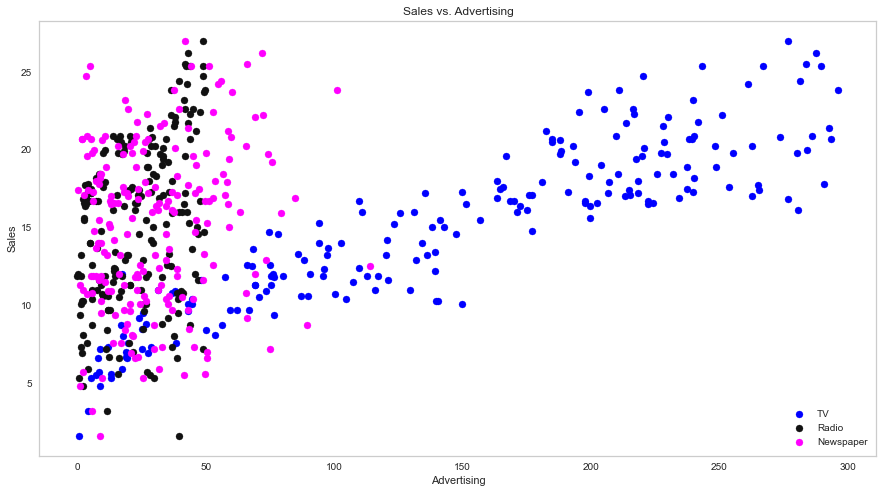

<Figure size 432x288 with 0 Axes>

In [300]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.scatter(df.TV, df.Sales, color='blue', label="TV")
plt.scatter(df.Radio, df.Sales, color='k', label='Radio')
plt.scatter(df.Newspaper, df.Sales, color='fuchsia', label='Newspaper')
plt.legend(loc="lower right")
plt.title("Sales vs. Advertising")
plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.grid()
plt.show()
plt.savefig("Sales - TV Radio Newspaper");

•Let's see the correlation between different variables.

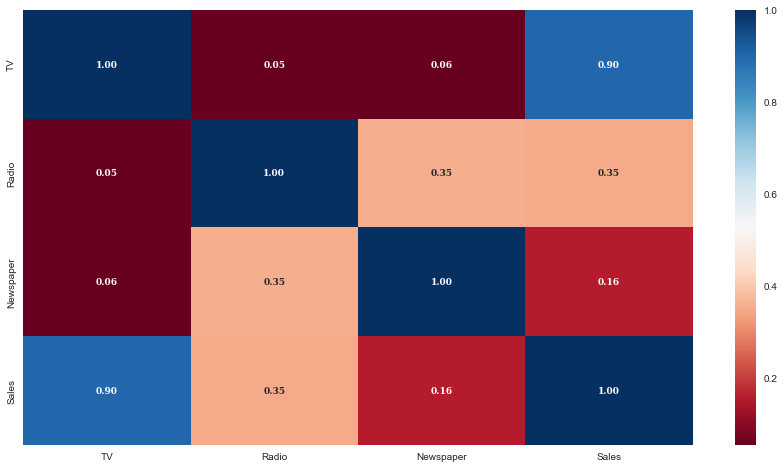

In [301]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",
                cmap="RdBu",
                annot_kws={
                       "fontsize":9,
                       "fontweight":"bold",
                       "fontfamily":"serif"});

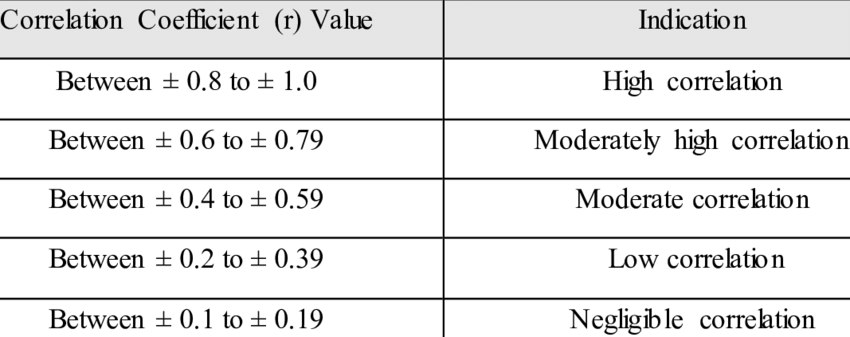

We see that there is a high correlation between TV and Sales.

We see that there is a low correlation between Radio and Sales.

We see that there is negligible correlation between Newspaper and Sales.

# Model Building

In [302]:
from sklearn.linear_model import LinearRegression

feature_columns = ["TV","Radio","Newspaper"]
X = df[feature_columns]
y = df["Sales"]

lm1 = LinearRegression()
lm1.fit(X, y)

print("intercept : ",lm1.intercept_)
print("coefficients : ",lm1.coef_)

intercept :  4.625124078808655
coefficients :  [0.05444578 0.10700123 0.00033566]


• Feature Selection

In [303]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'Radio']], y)
lm2_preds = lm2.predict(X[['TV', 'Radio']])

print("R^2: ", r2_score(y, lm2_preds))
print("intercept : ",lm2.intercept_)
print("coefficients : ",lm2.coef_)

R^2:  0.9025896186081139
intercept :  4.63087946409777
coefficients :  [0.05444896 0.10717457]


•Model Evaluation Using Train/Test Split and Metrics

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set.

Root Mean Squared Error is the square root of Mean Squared error.

The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

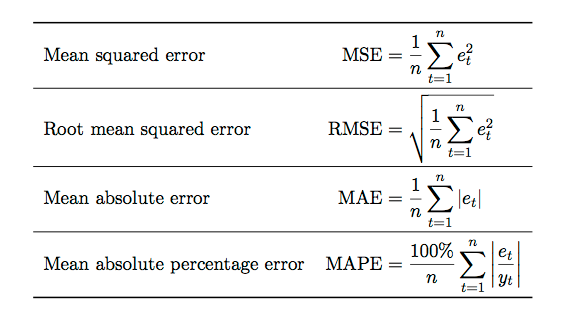

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
X = df[["TV","Radio","Newspaper"]]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 ,test_size=0.25 , random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print('MSE     :', metrics.mean_squared_error(y_test, lm4_preds))
print('RMSE    :', np.sqrt(metrics.mean_squared_error(y_test, lm4_preds)))
print('MAE     :', metrics.mean_absolute_error(y_test, lm4_preds))
print("R^2     :", r2_score(y_test, lm4_preds))

MSE     : 2.278925158685001
RMSE    : 1.509610929572584
MAE     : 1.2187904107011895
R^2     : 0.9048917241361681


In [305]:
X = df[['TV', 'Radio']]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 ,test_size=0.25 , random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print('MSE     :', metrics.mean_squared_error(y_test, lm5_preds))
print('RMSE    :', np.sqrt(metrics.mean_squared_error(y_test, lm5_preds)))
print('MAE     :', metrics.mean_absolute_error(y_test, lm5_preds))
print("R^2     :", r2_score(y_test, lm5_preds))

MSE     : 2.2778300140981322
RMSE    : 1.5092481618667397
MAE     : 1.2200517269212685
R^2     : 0.9049374287145224


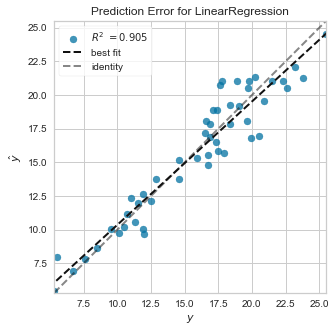

In [306]:
#pip install yellowbrick
from yellowbrick.regressor import PredictionError, ResidualsPlot
plt.figure(figsize=(10,5))
visualizer = PredictionError(lm5)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof();

In [307]:
df['interaction'] = df['TV'] * df['Radio']

X = df[['TV', 'Radio', 'interaction']]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 ,test_size=0.25 ,random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print('MSE     :', metrics.mean_squared_error(y_test, lm6_preds))
print('RMSE    :', np.sqrt(metrics.mean_squared_error(y_test, lm6_preds)))
print('MAE     :', metrics.mean_absolute_error(y_test, lm6_preds))
print("R^2     :", r2_score(y_test, lm6_preds))
print("intercept : ",lm6.intercept_)
print("coefficients : ",lm6.coef_)

MSE     : 2.063503597953453
RMSE    : 1.4364900270985013
MAE     : 1.1563462202167605
R^2     : 0.9138820909970508
intercept :  6.248487443084816
coefficients :  [0.04343485 0.03785673 0.00045365]


•Error terms

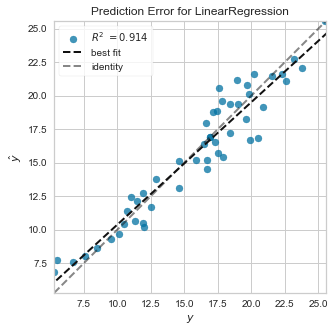

In [308]:
#test
plt.figure(figsize=(10,5))
visualizer = PredictionError(lm6)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof();

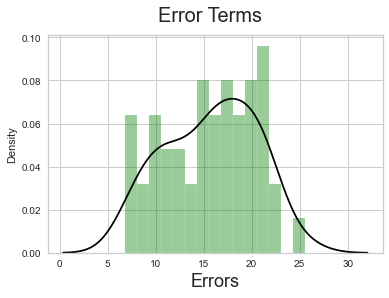

In [309]:
fig = plt.figure()
sns.distplot((lm6_preds), bins= 15,color ="green",kde_kws={"color":"black"})
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18);

The distribution as you can see from the graph is the normal distribution, but let's look at the Shapiro-Wilk test to be sure.

Ho(Accepted): Sample is from the normal distributions.(Po>0.05)

Ha(Rejected): Sample is not from the normal distributions.

In [310]:
from scipy.stats import shapiro
shapiro(lm6_preds)

ShapiroResult(statistic=0.9674016833305359, pvalue=0.18108747899532318)

H0 is considered. Since p>0.05, we say that it fits the normal distribution.

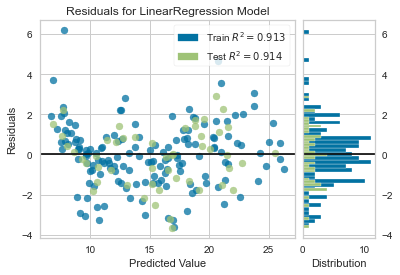

In [311]:
visualizer = ResidualsPlot(lm6)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof();

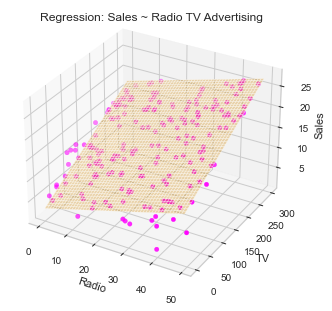

In [312]:
from mpl_toolkits.mplot3d import Axes3D
normal = np.array([0.19,0.05,-1])
point  = np.array([-15.26,0,0])
x, y = np.meshgrid(range(50), range(300))
d = -np.sum(point*normal)
z = (-normal[0]*x - normal[1]*y - d)*1./normal[2]
fig = plt.figure()
fig.suptitle('Regression: Sales ~ Radio TV Advertising')
ax = Axes3D(fig)

ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Sales')
ax.scatter(df.Radio, df.TV, df.Sales, c='fuchsia')

ax.plot_surface(x,y,z, color='orange', alpha=0.3);